**Random Forest Classifier - Company Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Retrieve input data
df_company = pd.read_csv('Company_Data.csv')
df_company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## **Exploratory Data Analysis (EDA)**

In [3]:
df_company.shape

(400, 11)

In [4]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
# Value counts to check the type of string variables
columns = ['ShelveLoc', 'Urban', 'US']

for x in columns:
  print('Value Counts of ', x)
  print(df_company[x].value_counts())


Value Counts of  ShelveLoc
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Value Counts of  Urban
Yes    282
No     118
Name: Urban, dtype: int64
Value Counts of  US
Yes    258
No     142
Name: US, dtype: int64


In [7]:
# Change all above columns into categorical variable

columns = ['ShelveLoc', 'Urban', 'US']

for x in columns:
  df_company[x] = df_company[x].astype('category')

df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [20]:
# Change strings in categorical variables to numerical values
columns = ['ShelveLoc', 'Urban', 'US']

for x in columns:
  df_company[x] = df_company[x].cat.codes

df_company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Type
0,9.50,138,73,11,276,120,0,42,17,1,1,1.0
1,11.22,111,48,16,260,83,1,65,10,1,1,1.0
2,10.06,113,35,10,269,80,2,59,12,1,1,1.0
3,7.40,117,100,4,466,97,2,55,14,1,1,0.0
4,4.15,141,64,3,340,128,0,38,13,1,0,0.0


In [21]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    int8    
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    int8    
 10  US           400 non-null    int8    
 11  Sales_Type   400 non-null    category
dtypes: category(1), float64(1), int64(7), int8(3)
memory usage: 26.8 KB


In [22]:
# Create new Sales_Type column as categorical column to have categories based on sales value as given in approach.

df_company['Sales_Type'] = df_company['Sales']

df_company.loc[df_company['Sales'] < df_company.Sales.mean(), 'Sales_Type'] = 0
df_company.loc[df_company['Sales'] >= df_company.Sales.mean(), 'Sales_Type'] = 1

df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int8   
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int8   
 10  US           400 non-null    int8   
 11  Sales_Type   400 non-null    float64
dtypes: float64(2), int64(7), int8(3)
memory usage: 29.4 KB


In [23]:
df_company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Type
0,9.50,138,73,11,276,120,0,42,17,1,1,1.0
1,11.22,111,48,16,260,83,1,65,10,1,1,1.0
2,10.06,113,35,10,269,80,2,59,12,1,1,1.0
3,7.40,117,100,4,466,97,2,55,14,1,1,0.0
4,4.15,141,64,3,340,128,0,38,13,1,0,0.0


In [24]:
# Change new column type to category
df_company['Sales_Type'] = df_company['Sales_Type'].astype('category')
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    int8    
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    int8    
 10  US           400 non-null    int8    
 11  Sales_Type   400 non-null    category
dtypes: category(1), float64(1), int64(7), int8(3)
memory usage: 26.8 KB


In [25]:
# check the distribution of output variable
df_company['Sales_Type'].value_counts()

0.0    201
1.0    199
Name: Sales_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


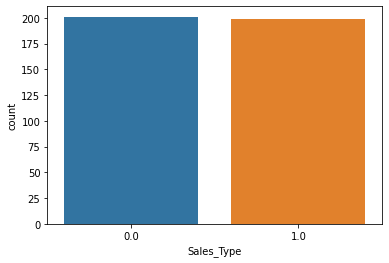

In [26]:
sns.countplot(df_company['Sales_Type'])

Balanced dataset with no null values.

In [27]:
# Separate out input and output features before creation of model
x = df_company.drop(['Sales', 'Sales_Type'], axis='columns')
y = df_company['Sales_Type']
print('x dataset')
print(x.head)
print('y dataset')
print(y.head())

x dataset
<bound method NDFrame.head of      CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10 

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


## **Random Forest Model Creation**

In [28]:
# Assign hyper parameter values
num_trees = 100
max_features = 3

# Create kfold and model
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features = max_features, criterion='gini')
model.fit(x, y)

RandomForestClassifier(max_features=3)

In [29]:
preds = model.predict(x)
preds[0:10]

array([1., 1., 1., 0., 0., 1., 0., 1., 0., 0.])

In [30]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y, preds)

array([[201,   0],
       [  0, 199]])

In [32]:
from sklearn.metrics import classification_report
# Classification Report
print(classification_report(y, preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       201
         1.0       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [34]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8075000000000001


Observation: Model got created with 100% accuracy

### Model evaluation with partial data

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 123 )

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(300, 10)
(300,)
(100, 10)
(100,)


In [48]:
preds = model.predict(x_test)
preds[0:10]

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

In [49]:
confusion_matrix(y_test, preds)

array([[42,  0],
       [ 0, 58]])

In [51]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        42
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Model predicted correctly with partial input data i.e. test data